<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <p class="h1" style="color:blue; text-align:center">Classifiez automatiquement des biens de consommation <br/></p>
   </div>   

 <p>
L’entreprise <a> "Place de marché”</a>, souhaite lancer une marketplace e-commerce. Sur celle-ci, des vendeurs proposent des articles à des acheteurs en postant une photo et une description. Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, place de marché aimerais donc automatiser cette tâche. Elle fait donc appel à nous pour étudier la faisabilité d'un <a style="color:red">moteur de classification des articles</a> en différentes catégories, avec un niveau de précision suffisant.
 </p>
      
      
Notre mission est donc de réaliser une première étude de faisabilité d'un moteur de classification d'articles, basé sur une <b>image</b>  et une <b>description</b>, pour l'automatisation de l'attribution de la <a> catégorie de l'article</a>.


Nous allons analyser le jeu de données en réalisant un <b>prétraitement</b> des descriptions des produits et des images, une <b>réduction de dimension</b> , puis un <b>clustering</b>. 
                  
                  
 <a class="btn btn-primary btn-lg" href=" https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce" role="button">Jeu de données</a>
  <hr class="my-4">
   
  </div>
</div>

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 0. Mission et Compétences évaluées à l'issue du Projet </p>



<h2 style="color:green; text-align:left;"> Mission à réaliser </h2>

Les **résultats de la réduction de dimension et du clustering** seront :

- Présenter sous la forme de graphiques en deux dimensions, et 
- Confirmés par un calcul de similarité entre les catégories réelles et les clusters. 
- Ceux-ci illustreront le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.


Une approche de modélisation et la faisabilité de regrouper automatiquement des produits de même catégorie.


<h2 style="color:green; text-align:left;"> Pistes de Reflexion  </h2>

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
- Deux approches de type “**bag-of-words**”, comptage simple de mots et **Tf-idf** ;
- une approche de type word/**sentence embedding** classique avec **Word2Vec** (ou **Glove** ou **FastText**) ;
- une approche de type word/**sentence embedding** avec **BERT** ;
- une approche de type word/**sentence embedding** avec **USE** (Universal Sentence Encoder). 
 

<p class="h2"; style="color:white; text-align:center; background-color:blue">  Mise en Place de l'environnement de Travail  </p>

Nous avons une variété de bibliothèques pour le traitement des données. Python offre des fonctionnalités complètes ainsi que de puissantes bibliothèques statistiques et numériques pour l'analyse de données : **Numpy, Pandas and Matplolib**.

- **NumPy** est une bibliothèque Python qui offre des fonctionnalités comparables à celles d’outils mathématiques comme MATLAB et R et propose donc des fonctions mathématiques complète
- **Pandas** est une bibliothèque Python extrêmement populaire pour l’analyse et la manipulation de données. C’est l’équivalent d’Excel pour Python, car elle fournit des fonctionnalités faciles à utiliser pour les tables de données. Par exemple Pandas peut ouvrir des fichiers texte ( .csv ) et les sauvegarder de facon structurer dans des tables appelés  **DataFrame**.
- NumPy et Pandas simplifient l’analyse et la manipulation de données.
- Matplotlib fournit des visualisations des données attrayantes.

#### Import Lirairies

In [1]:
# Import des librairies utiles à l'analyse exploratoire
# **Importation des librairies Python nécessaires**

import os, sys, time

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display

#### Graphics options

In [2]:
sns.set()

In [3]:
# Affichage d'un maximum de les lignes et colonnes
pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 300)

#chiffre après la virgule
pd.set_option('display.precision', 5)

In [4]:
# Affichage des erreurs
import warnings
warnings.filterwarnings("ignore")

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 2. Chargement et Presentation du Jeu de données  </p>

#### Loading Data

In [5]:
# Importing the differents dataset released by Olist
ecommerce_sample = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv", delimiter=',',header='infer')

#### First Tour 

In [6]:
# Fonction permettant d'avoir une description du dataset

def dataset_overview(df):
    ''' function taking a dataframe in input and prints a dataframe summary containing
    number of rows, columns, missing cells and duplicate rows'''
    
    print('******** Dataset Overview *****\n')
    
    print ('Shape of the Dataset : {}'.format(df.shape))
    print ('Number of variables : {}'.format(df.shape[1]))
    print (' - Num. Quantitative variables : {}'.format(len(df.select_dtypes(include=["float64","int64"]).columns)))
    print (' - Num. Qualitative variables : {}'.format(len(df.select_dtypes(include=["object"]).columns)))
    print ('Number of obervations : {}'.format(df.shape[0]))
    print ('Number of cells : {}'.format(df.size))
    print ('Missing cells : {}'.format(df.isna().sum().sum()))
    print ('Missing cells in % : {:.2%}'.format(df.isna().sum().sum()/(df.size)))
    print ('Duplicate rows : {}'.format(len(df)-len(df.drop_duplicates())))
    print ('Duplicate rows in % : {:.4%}'.format((len(df)-len(df.drop_duplicates())) / (df.shape[0])))
    print("\n************** End ************")

dataset_overview(ecommerce_sample)

******** Dataset Overview *****

Shape of the Dataset : (1050, 15)
Number of variables : 15
 - Num. Quantitative variables : 2
 - Num. Qualitative variables : 12
Number of obervations : 1050
Number of cells : 15750
Missing cells : 341
Missing cells in % : 2.17%
Duplicate rows : 0
Duplicate rows in % : 0.0000%

************** End ************


In [7]:
df = ecommerce_sample.copy()

#### 2.1 Display Data

In [8]:
pd.set_option('display.max_colwidth', 20)

df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d4...,2016-04-30 03:22...,http://www.flipk...,Elegance Polyest...,"[""Home Furnishin...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d4...,False,Key Features of ...,No rating available,No rating available,Elegance,"{""product_specif..."
1,7b72c92c2f6c4026...,2016-04-30 03:22...,http://www.flipk...,Sathiyas Cotton ...,"[""Baby Care >> B...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c4026...,False,Specifications o...,No rating available,No rating available,Sathiyas,"{""product_specif..."
2,64d5d4a258243731...,2016-04-30 03:22...,http://www.flipk...,Eurospa Cotton T...,"[""Baby Care >> B...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731...,False,Key Features of ...,No rating available,No rating available,Eurospa,"{""product_specif..."
3,d4684dcdc759dd9c...,2016-06-20 08:49...,http://www.flipk...,SANTOSH ROYAL FA...,"[""Home Furnishin...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9c...,False,Key Features of ...,No rating available,No rating available,SANTOSH ROYAL FA...,"{""product_specif..."
4,6325b6870c54cd47...,2016-06-20 08:49...,http://www.flipk...,Jaipur Print Cot...,"[""Home Furnishin...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47...,False,Key Features of ...,No rating available,No rating available,Jaipur Print,"{""product_specif..."


In [9]:
#df.tail()

In [10]:
#df.sample(10)

#### 2.2  Data Structure

In [11]:
df.shape

(1050, 15)

In [12]:
#df.dtypes

In [13]:
#df.info()

In [14]:
#df.dtypes.value_counts()

In [15]:
#df.nunique()

#### 2.3 Nan and Duplicated

In [16]:
#df.isnull().sum()

In [17]:
#df.isnull().mean().sort_values() * 100

<Axes: >

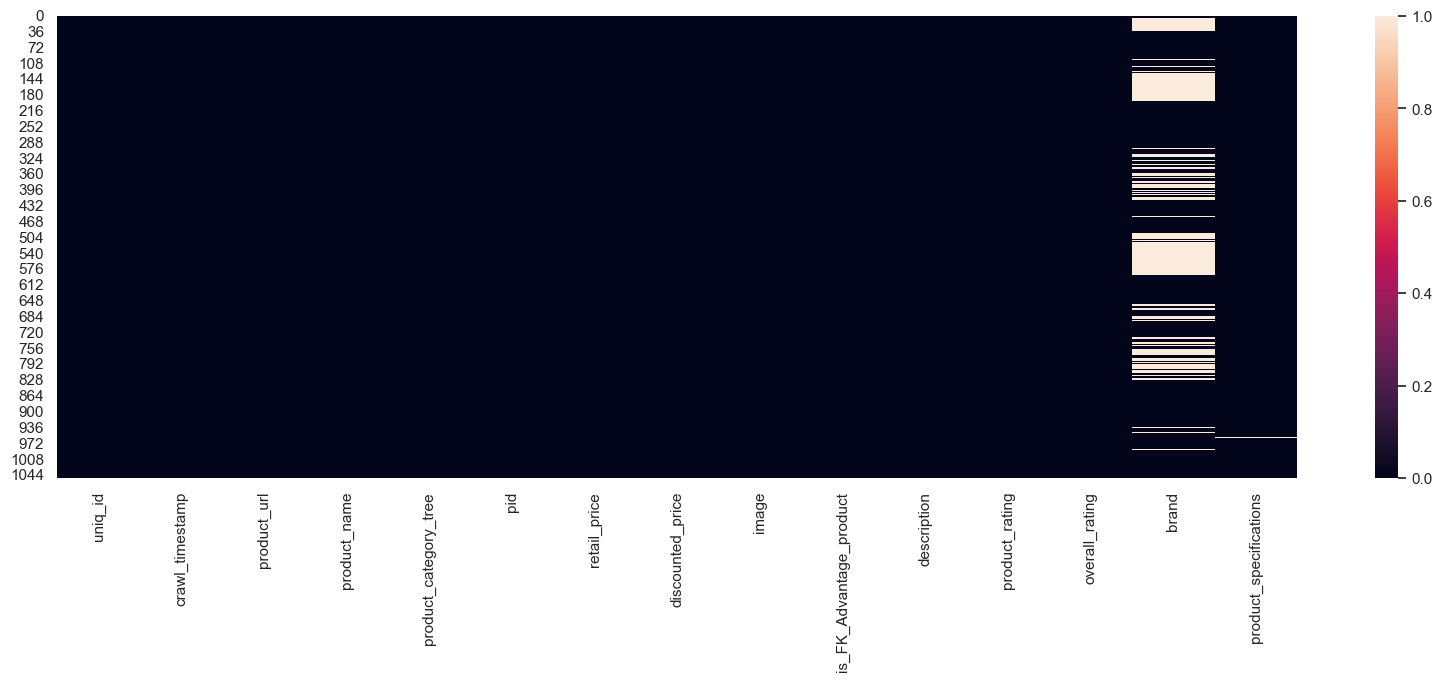

In [18]:
fig, ax =  plt.subplots(1,1, figsize =(20, 6))
sns.heatmap(df.isnull())

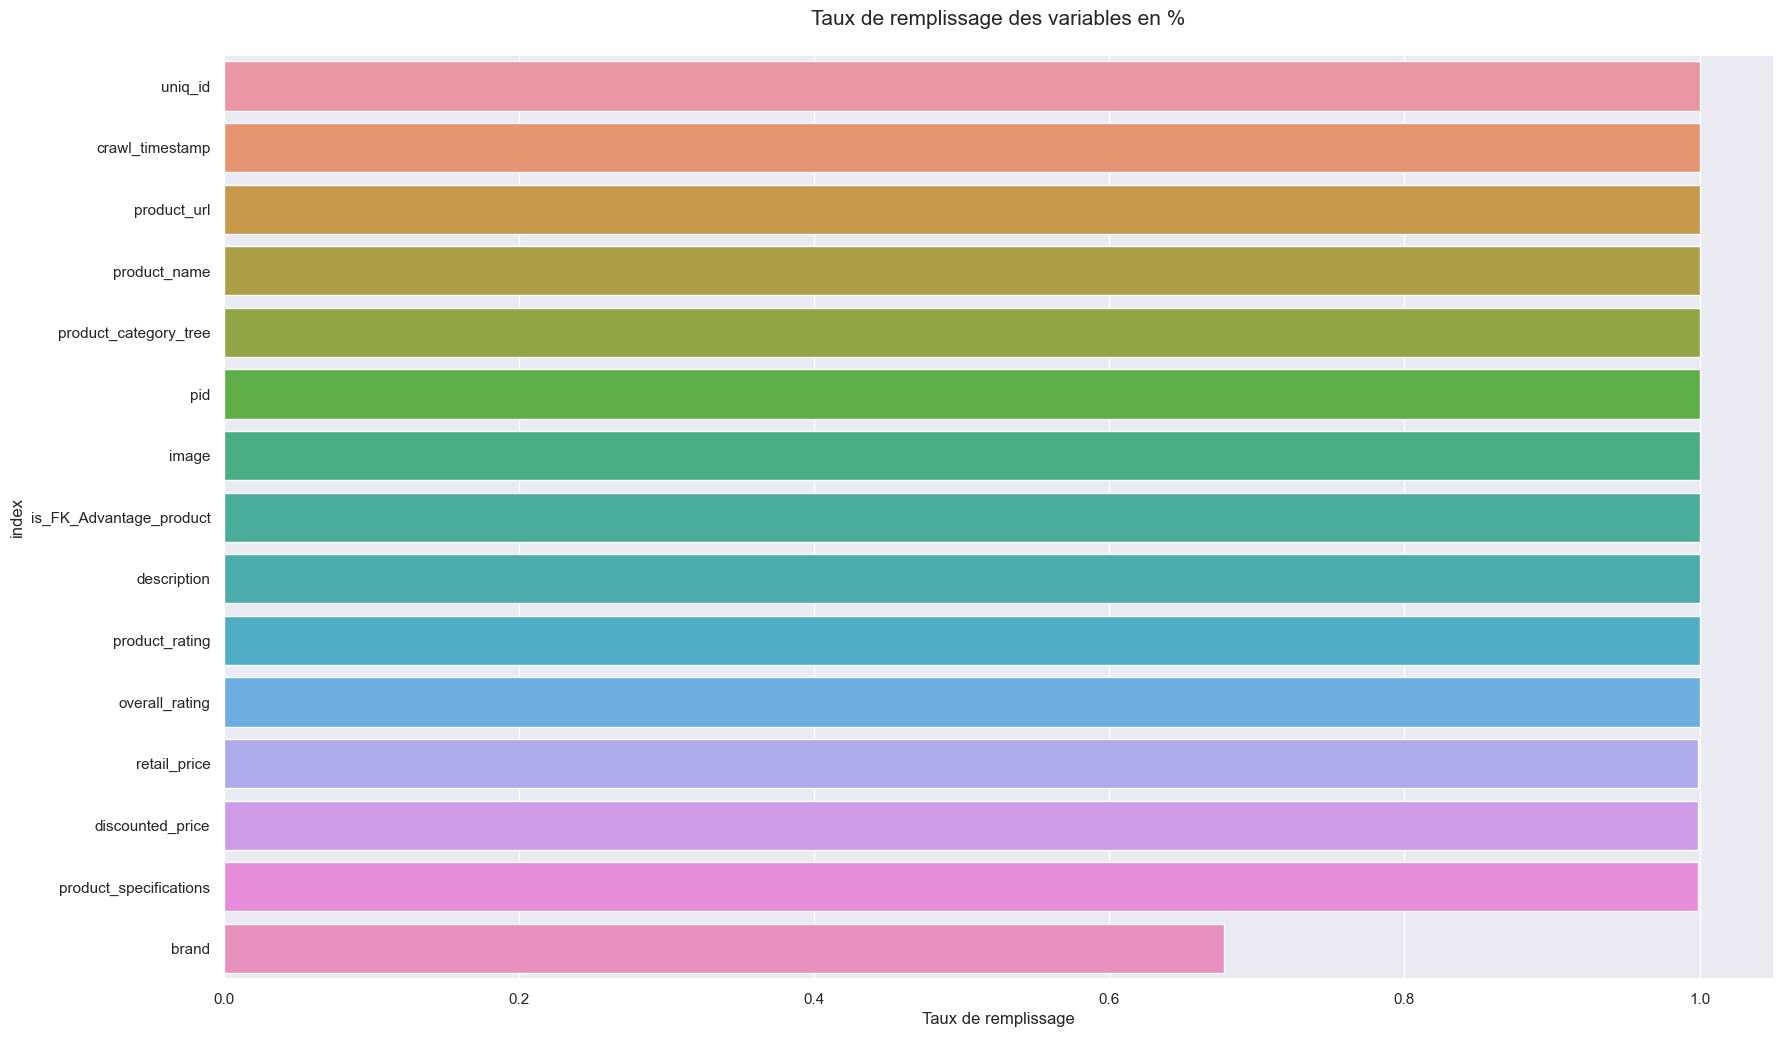

In [19]:
# **Répartition des données entre les variables des colonnes**

def graphe_remplissage_variable(df):
  # Répartition du taux de remplissage des colonnes: 
    df = pd.DataFrame(round(df.shape[0] - df.isna().sum())/df.shape[0],
                    columns=['Taux de remplissage']).sort_values('Taux de remplissage', 
                                                                 ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20,12))
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables en %\n', fontsize = 15)
    plt.show()
    
graphe_remplissage_variable(df)

In [20]:
df['brand'].fillna('Unknown', inplace=True)
df['product_specifications'].fillna('Unknown', inplace=True)

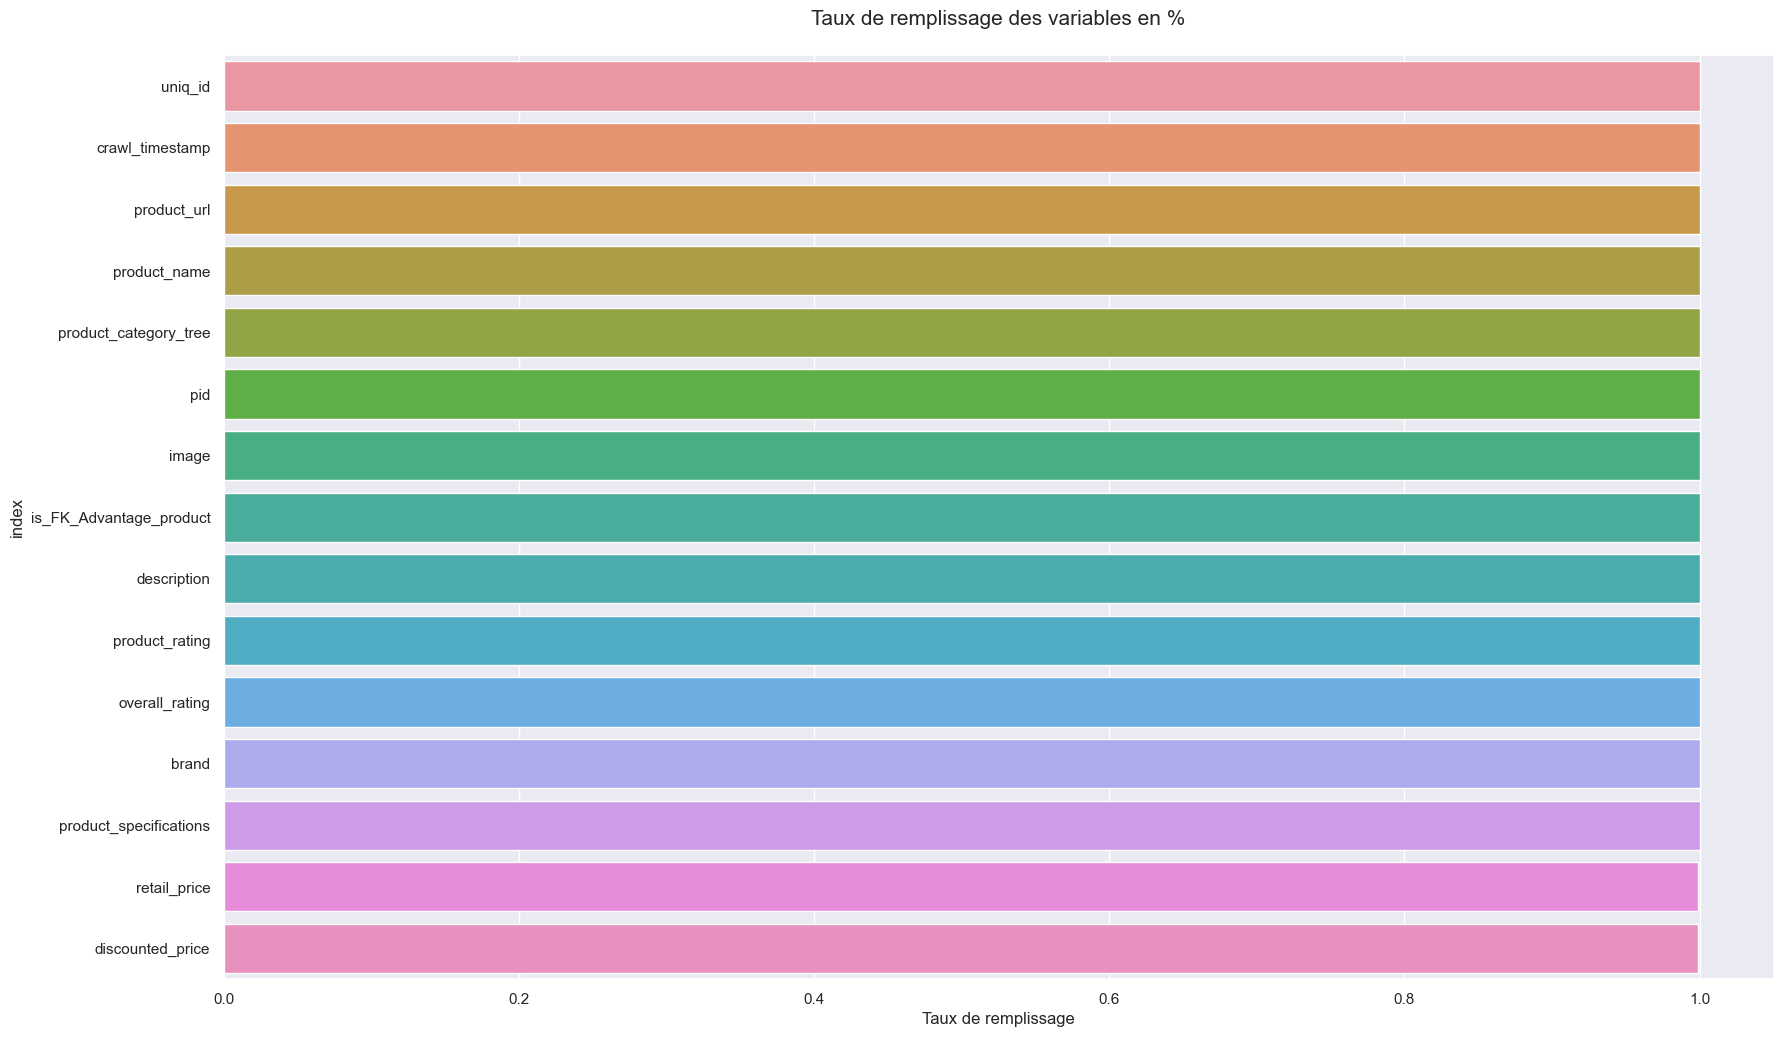

In [21]:
graphe_remplissage_variable(df)

#### Duplicatat ?

In [22]:
#df.duplicated().sum()

In [23]:
print("Taille total du jeu de données : ", df.shape)
print("-"*50)
for col in df.columns :
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} ---> duplicated : {n}")

Taille total du jeu de données :  (1050, 15)
--------------------------------------------------
col : uniq_id ---> duplicated : 0
col : crawl_timestamp ---> duplicated : 901
col : product_url ---> duplicated : 0
col : product_name ---> duplicated : 0
col : product_category_tree ---> duplicated : 408
col : pid ---> duplicated : 0
col : retail_price ---> duplicated : 695
col : discounted_price ---> duplicated : 625
col : image ---> duplicated : 0
col : is_FK_Advantage_product ---> duplicated : 1048
col : description ---> duplicated : 0
col : product_rating ---> duplicated : 1023
col : overall_rating ---> duplicated : 1023
col : brand ---> duplicated : 559
col : product_specifications ---> duplicated : 65


In [24]:
pd.set_option('display.max_colwidth', 20)

idx = df.duplicated(subset="product_specifications", keep="first")
df.loc[idx, : ].sort_values("product_specifications").head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
765,3d8222014ec36292...,2015-12-12 11:46...,http://www.flipk...,Nutcase Sticker ...,"[""Kitchen & Dini...",BOTEANCHSXYX32RJ,799.0,399.0,3d8222014ec36292...,False,Nutcase Sticker ...,No rating available,No rating available,Unknown,"{""product_specif..."
745,daf06eb2b9613900...,2015-12-12 11:46...,http://www.flipk...,Nutcase Sticker ...,"[""Kitchen & Dini...",BOTEANCHRVE7K3CS,799.0,399.0,daf06eb2b9613900...,False,Nutcase Sticker ...,No rating available,No rating available,Unknown,"{""product_specif..."
744,73523a8cc9a5c04a...,2015-12-12 11:46...,http://www.flipk...,Nutcase Sticker ...,"[""Kitchen & Dini...",BOTEANCHFY7TGFKX,799.0,399.0,73523a8cc9a5c04a...,False,Nutcase Sticker ...,No rating available,No rating available,Unknown,"{""product_specif..."
766,503bb08f7bdf6a39...,2015-12-12 11:46...,http://www.flipk...,Nutcase Sticker ...,"[""Kitchen & Dini...",BOTEANCHDNKDTKGH,799.0,399.0,503bb08f7bdf6a39...,False,Nutcase Sticker ...,No rating available,No rating available,Unknown,"{""product_specif..."
743,d47f1cb78db4a23e...,2015-12-12 11:46...,http://www.flipk...,Nutcase Sticker ...,"[""Kitchen & Dini...",BOTEANCH6ZZZHJVD,799.0,399.0,d47f1cb78db4a23e...,False,Nutcase Sticker ...,No rating available,No rating available,Unknown,"{""product_specif..."


#### 2.4 Data Inspection

In [25]:
df.describe(include=np.number)

,retail_price,discounted_price
count,1049.00000,1049.00000
mean,2186.19733,1584.52717
std,7639.22941,7475.09968
min,35.00000,35.00000
25%,555.00000,340.00000
50%,999.00000,600.00000
75%,1999.00000,1199.00000
max,201000.00000,201000.00000


In [26]:
pd.set_option('display.max_colwidth', 20)

df.describe(include=["object","bool"])

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
unique,1050,149,1050,1050,642,1050,1050,2,1050,27,27,491,985
top,55b85ea15a1536d4...,2015-12-01 12:40...,http://www.flipk...,Elegance Polyest...,"[""Home Furnishin...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d4...,False,Key Features of ...,No rating available,No rating available,Unknown,"{""product_specif..."
freq,1,150,1,1,56,1,1,993,1,889,889,338,22


<p class="h2"; style="color:white; text-align:center; background-color:blue"> Traitement des valeurs manquantes et Mise en forme des données</p>

In [27]:
tmp = df.dtypes
tmp

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

### Normalisation des variables numériques et temporelles

In [28]:
df[["overall_rating", "product_rating", "crawl_timestamp"]].head()

,overall_rating,product_rating,crawl_timestamp
0,No rating available,No rating available,2016-04-30 03:22...
1,No rating available,No rating available,2016-04-30 03:22...
2,No rating available,No rating available,2016-04-30 03:22...
3,No rating available,No rating available,2016-06-20 08:49...
4,No rating available,No rating available,2016-06-20 08:49...


In [29]:
#df.dtypes.value_counts()

In [30]:
df["crawl_timestamp"] = pd.to_datetime(df["crawl_timestamp"], format="%Y-%m-%d %H:%M:%S.%f", utc=True)
df["is_FK_Advantage_product"] = df["is_FK_Advantage_product"].astype(str)

df["overall_rating"] = df["overall_rating"].replace("No rating available", np.NaN)
df["product_rating"] = df["product_rating"].replace("No rating available", np.NaN)

df["product_rating"] = df["product_rating"].astype(float)
df["overall_rating"] = df["overall_rating"].astype(float)

In [31]:
df.dtypes.value_counts()

object                 10
float64                 4
datetime64[ns, UTC]     1
dtype: int64

In [32]:
df.describe(include=["float64"])
#df.describe()

,retail_price,discounted_price,product_rating,overall_rating
count,1049.00000,1049.00000,161.00000,161.00000
mean,2186.19733,1584.52717,3.88075,3.88075
std,7639.22941,7475.09968,1.12258,1.12258
min,35.00000,35.00000,1.00000,1.00000
25%,555.00000,340.00000,3.50000,3.50000
50%,999.00000,600.00000,4.00000,4.00000
75%,1999.00000,1199.00000,5.00000,5.00000
max,201000.00000,201000.00000,5.00000,5.00000


### Normalisation des variables catégorielles

In [33]:
pd.set_option('display.max_colwidth', 10)

df.describe(include=["object"])
#df[object_cols].describe()

,uniq_id,product_url,product_name,product_category_tree,pid,image,is_FK_Advantage_product,description,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050
unique,1050,1050,1050,642,1050,1050,2,1050,491,985
top,55b85e...,http:/...,Elegan...,"[""Home...",CRNEG7...,55b85e...,False,Key Fe...,Unknown,"{""prod..."
freq,1,1,1,56,1,1,993,1,338,22


#### Extraction des catégories de la variable `product_category_tree`

Chaque produit est catégorisée par un système d'arbres avec plusieurs niveaux. Le nom de la colonne renseignant les catégories est `product_category_tree`.

In [34]:
df["product_category_tree"][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [35]:
df["product_category_tree"][0].split(sep=">>")

['["Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [36]:
df["product_category_tree"][0].split(sep=">>")[0].split("\"")[1]

'Home Furnishing '

In [37]:
df["category_0"] = df["product_category_tree"].apply(lambda x : x.split(">>")[0].split("\"")[1])
df["category_1"] = df["product_category_tree"].apply(lambda x : x.split(">>")[1])
#df["Category_tree_2"] = df["product_category_tree"].apply(lambda x : x.split(">>")[1])

In [38]:
print("-  {} catégories de niveau 0".format(df["category_0"].nunique()))
print("-  {} catégories de niveau 0".format(df["category_1"].nunique()))
#df["category_0"].nunique()

-  7 catégories de niveau 0
-  63 catégories de niveau 0


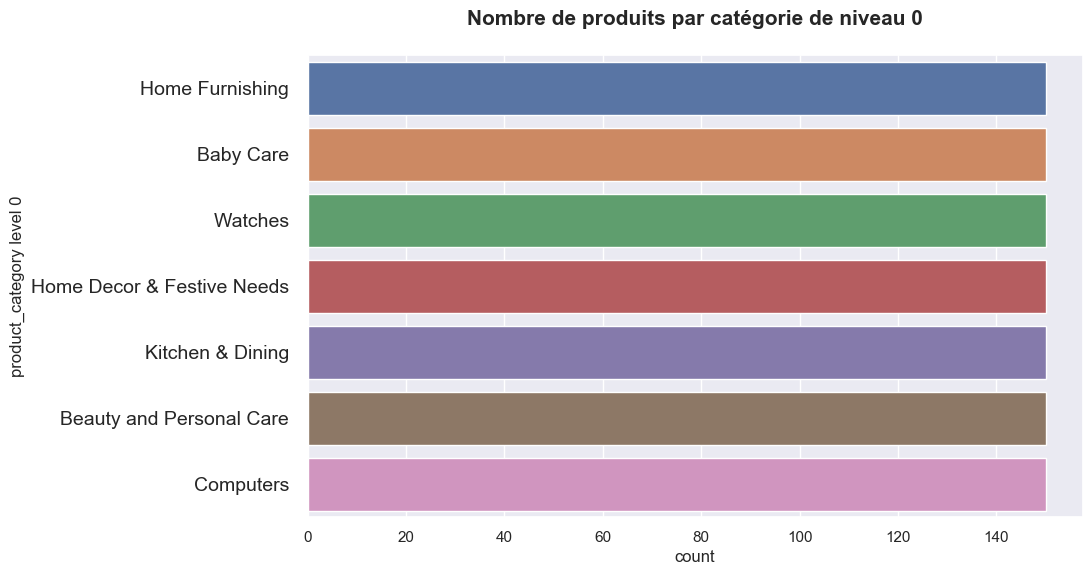

In [39]:
fig = plt.figure(figsize=(10, 6))

font_title = {"weight": "bold", "size": 15}

sns.countplot(data=df, y="category_0", order = df["category_0"].value_counts().index,)
plt.yticks(size=14)
plt.title(f"Nombre de produits par catégorie de niveau 0\n", fontdict=font_title)
plt.ylabel("product_category level 0", fontsize=12)
plt.show()

In [40]:
#df.drop(columns="categroy_1", inplace=True)

In [41]:
pd.set_option('display.max_colwidth', 50)

df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_0,category_1
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,NaN,NaN,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,NaN,NaN,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,NaN,NaN,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,NaN,NaN,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,NaN,NaN,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen


<Axes: >

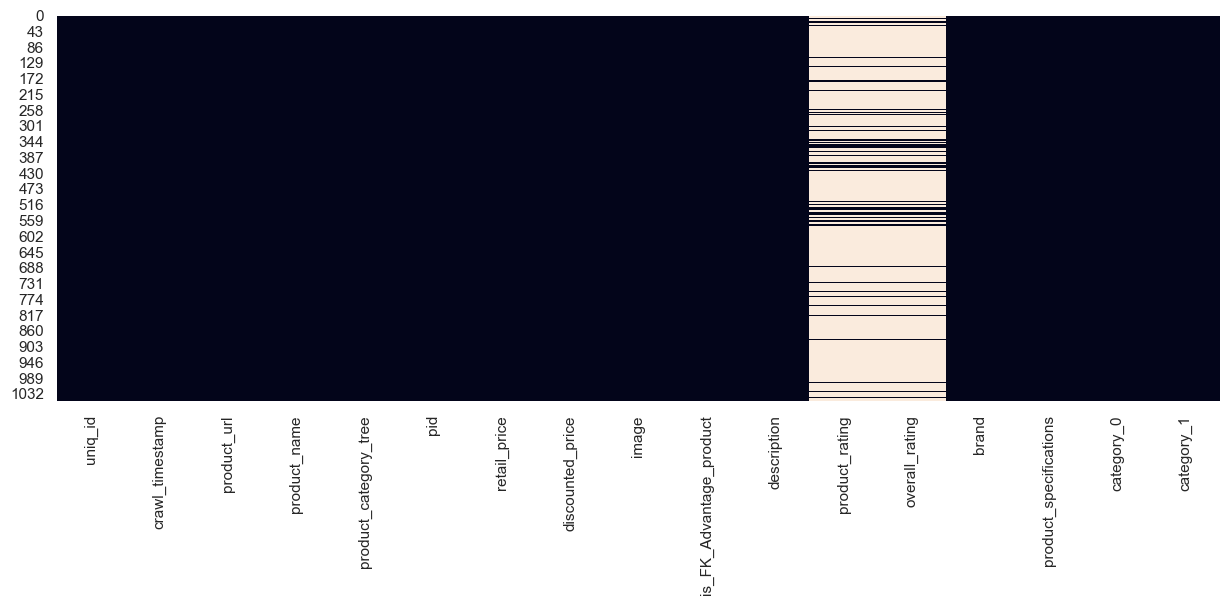

In [42]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna(), cbar=False)

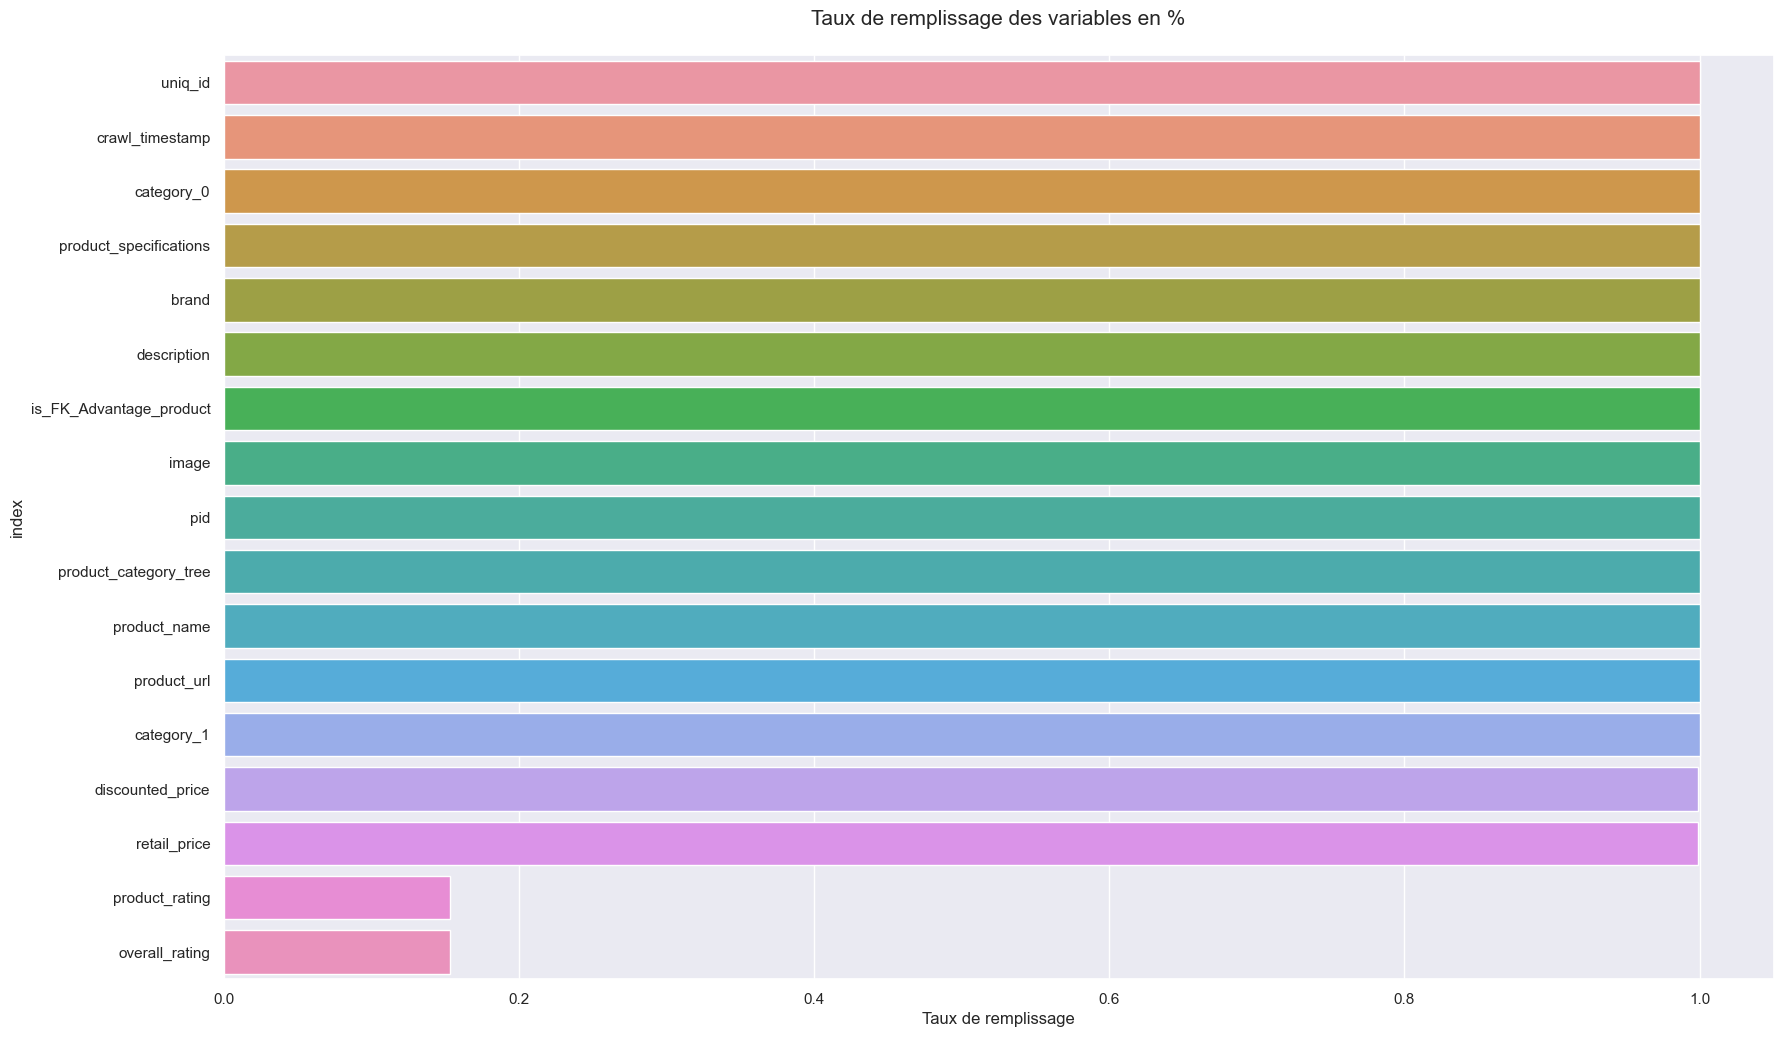

In [43]:
# **Répartition des données entre les variables des colonnes**

def graphe_remplissage_variable(df):
  # Répartition du taux de remplissage des colonnes: 
    df = pd.DataFrame(round(df.shape[0] - df.isna().sum())/df.shape[0],
                    columns=['Taux de remplissage']).sort_values('Taux de remplissage', 
                                                                 ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20,12))
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables en %\n', fontsize = 15)
    plt.show()

graphe_remplissage_variable(df)

In [44]:
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating             889
overall_rating             889
brand                        0
product_specifications       0
category_0                   0
category_1                   0
dtype: int64

In [45]:
#df.isnull().mean() * 100

In [46]:
#df["crawl_timestamp"].dt.date

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 4. Analyse Exploratoire des données </p>

In [47]:
print(df.columns)

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'category_0',
       'category_1'],
      dtype='object')


In [48]:
variable_to_use = ['uniq_id', 'product_name', 'image', 'description', "brand", 'category_0' ]

In [49]:
df_analysis = df[variable_to_use]

In [50]:
pd.set_option('display.max_colwidth', 100)
df_analysis.head()

,uniq_id,product_name,image,description,brand,category_0
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...",Elegance,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...",Sathiyas,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...",Eurospa,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...,SANTOSH ROYAL FASHION,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...",Jaipur Print,Home Furnishing


#### Variable Category

In [51]:
#df.drop(columns="product_category", inplace=True)

df_analysis.rename(columns={"category_0":"category"}, inplace=True)
#df.rename(columns={"category_1":"manual_category"}, inplace=True)

In [52]:
df_analysis['category'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [53]:
df_analysis['category'] = df_analysis['category'].str.strip()
#df_analysis['category'] = df_analysis['category'].str.replace('&', 'and')
df_analysis['category'] = df_analysis['category'].str.replace(' ', '_')
df_analysis['category'] = df_analysis['category'].str.lower()
df_analysis['category'].unique()

array(['home_furnishing', 'baby_care', 'watches',
       'home_decor_&_festive_needs', 'kitchen_&_dining',
       'beauty_and_personal_care', 'computers'], dtype=object)

In [54]:
df_analysis.category.value_counts()

home_furnishing               150
baby_care                     150
watches                       150
home_decor_&_festive_needs    150
kitchen_&_dining              150
beauty_and_personal_care      150
computers                     150
Name: category, dtype: int64

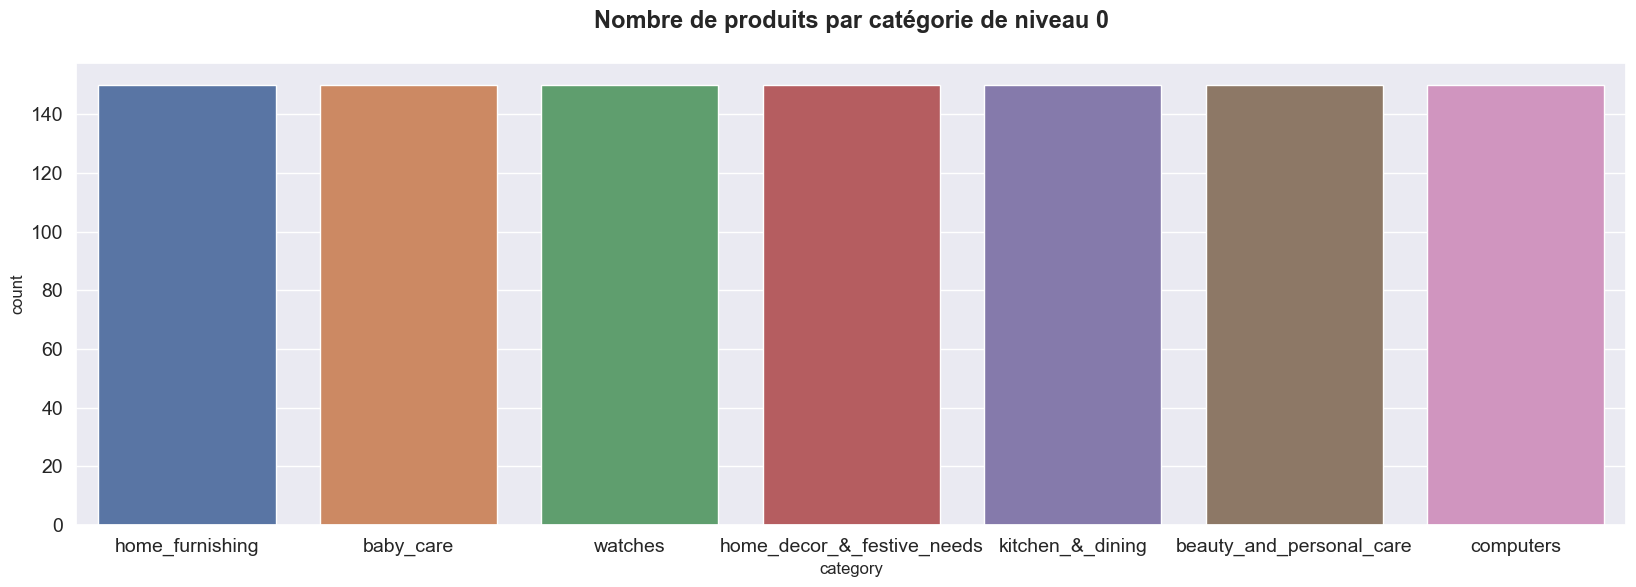

In [55]:
fig = plt.figure(figsize=(20, 6))
sns.countplot(data=df_analysis, x="category")

font_title = {"weight": "bold",
              "size": 17}

plt.yticks(size=14)
plt.xticks(size=14)
plt.title(f"Nombre de produits par catégorie de niveau 0\n",
          fontdict=font_title)
#plt.xlabel("product_category level 0", fontsize=14)
plt.show()

In [56]:
#sns.barplot(df["Category_tree_1"])

#### Variable Brand

In [59]:
def graphe_objet(dataframe, col, wordcloud=False, barplot=False):
    """This function allows the creation of
    WordCloud and histograms 
    for the most common occurrences.
    dataframe : dataset"""
    from wordcloud import WordCloud, STOPWORDS
    if wordcloud != False:
        counts = dataframe[col].value_counts()
        counts.index = counts.index.map(str)
        wordcloud = WordCloud(
            background_color='white',
            stopwords=STOPWORDS,
            max_words=200,
            max_font_size=40,
            scale=3,
            random_state=5  # chosen at random by flipping a coin; it was heads
        ).generate_from_frequencies(counts)
        fig = plt.figure(1, figsize=(12, 12))
        plt.axis('off')
        fig.suptitle("WordCloud of the variable {}" .format(col), fontsize=20)
        fig.subplots_adjust(top=2.3)
        plt.imshow(wordcloud)
        plt.show()
        print("\n \n")

    if barplot != False:
        count = dataframe[col].value_counts()
        count = count[:20, ]
        plt.figure(figsize=(15, 10))
        sns.set(style="whitegrid")
        #sns.barplot(count.values, count.index, alpha=0.8, orient='h')
        plt.title("Top 20 number of occurrences for the variable {}" .format(col))
        plt.xlabel('Number of Occurrences', fontsize=12)
        plt.show()
        print("\n \n \n \n \n")

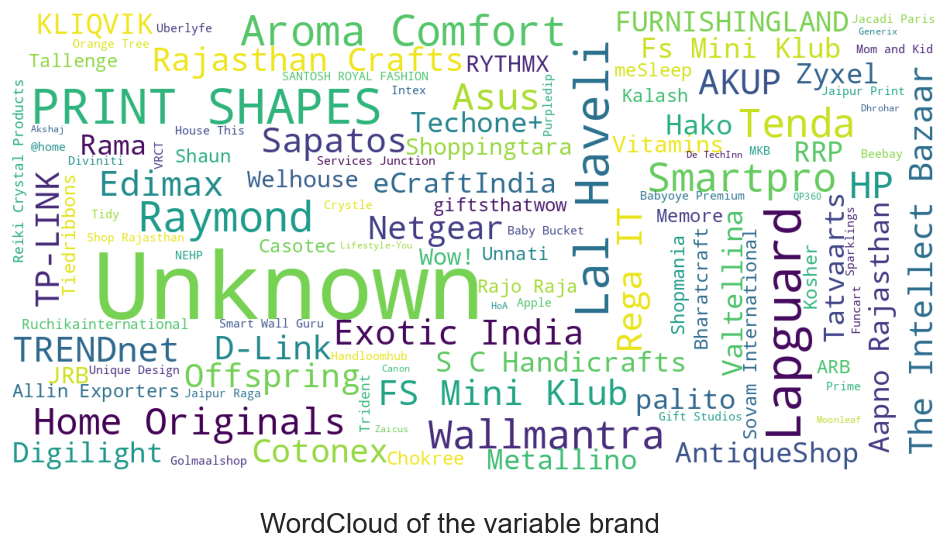

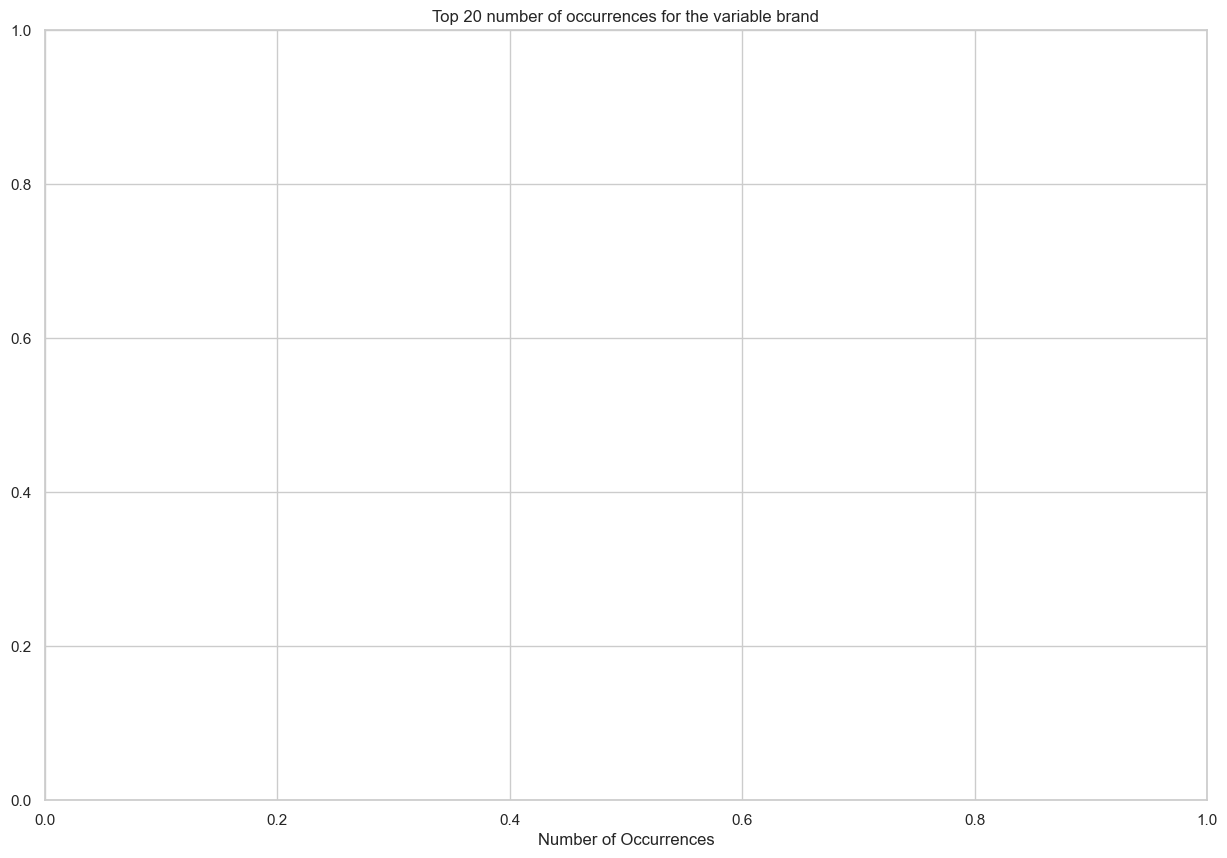

In [60]:
graphe_objet(df_analysis, 'brand', True, True)

#### Variable Description

In [61]:
df_analysis.description

0       Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...
1       Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...
2       Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...
3       Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
4       Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...
                                                       ...                                                 
1045    Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n                         Price: Rs. 1,896\...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberly...
1048    Buy Wallmantra Mediu

In [62]:
df_analysis.description[0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [63]:
df_samp = df_analysis.sample(5)

for idx, vec in df_samp.iterrows():
    txt_1 = f"Category : {vec['category']}\n"
    print(txt_1 + vec["description"]+ "..." + "\n\n")

Category : watches
Maxima 03918CMLY Analog Watch  - For Women - Buy Maxima 03918CMLY Analog Watch  - For Women  03918CMLY Online at Rs.795 in India Only at Flipkart.com. Stainless Steel Back Case, Water Resistant, Deployment Clasp, Golden Strap, Round Dial - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


Category : computers
Specifications of I Ball IBCTDC 160/2gb/DDR2 with Dual Core 2 RAM 160 Hard Disk (Free DOS) Performance Features Processor Speed 2.33 GHz Processor Name Intel Processor Type Dual Core Number of Cores 2 General Brand I Ball Operating System Free DOS Graphics Memory NA GB Model Name IBCTDC 160/2gb/DDR2 Graphics Intel onboard System Memory and Storage Features Memory Technology DDR2 RAM 2 GB Hard Disk Capacity 160 GB Warranty Covered in Warranty All Parts of the Product Service Type 1 Year Domestic Warranty Warranty Summary 1 Year Domestic warranty covered for all parts of the product Not Covered in Warranty 

In [64]:
# Taille du texte
df_analysis["description"].apply(lambda i : len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64

<Axes: >

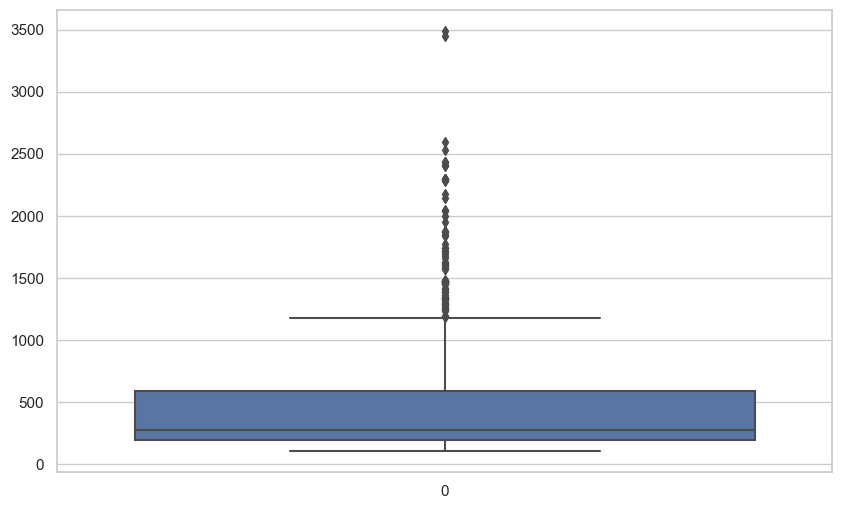

In [65]:
tmp = df_analysis["description"].str.len()
#tmp

plt.figure(figsize=(10, 6))

#plt.subplot(122)
sns.boxplot(tmp)


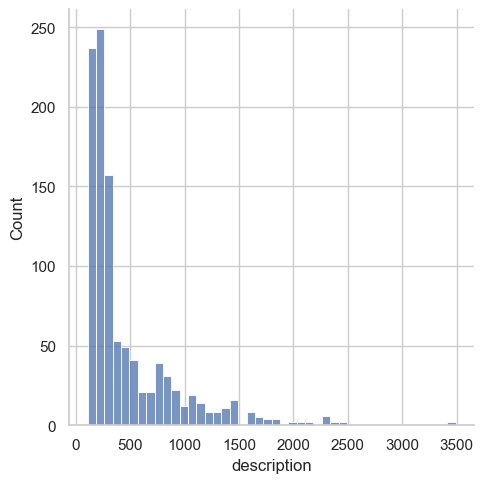

In [66]:
sns.displot(tmp)

#### Variable Image

In [69]:
!pip install cv

In [ ]:
import PIL
import cv
from matplotlib.image import imread

path = "./Flipkart/Images/"
for j, categ in enumerate(df_analysis["category"].unique()) :
    bolded_string = "\033[1m" + categ + "\033[0m"
    print(bolded_string)
    # print("-------")
    plt.figure(figsize=(20, 10))
    for i in range(10):
        name_image = df_analysis[df_analysis["category"] == categ]["image"].iloc[i]
        plt.subplot(1, 10, 0 + 1 + i)
        filename = path + name_image
        img = imread(filename)
        plt.imshow(img)
        plt.axis('off')    
    plt.show()   

<p class="h2"; style="color:white; text-align:center; background-color:blue"> 5. Prétraitement des données textuelles </p>

# Analyse et Traitement de Text - NLP


Le **traitement en langage naturel (NLP)** est une branche de l’intelligence artificielle (IA) qui traite du langage écrit et parlé. Vous pouvez l’utiliser pour créer des solutions qui extraient la signification sémantique du texte ou du discours, ou qui formulent des réponses pertinentes en langage naturel.


Découvrons l’exploration de texte et l’analyse de texte avec les fonctionnalités de traitement en langage naturel (NLP)  qui incluent
- L’analyse des sentiments, 
- L’extraction d’expressions clés, 
- La reconnaissance d’entité nommée et 
- La détection de langage.

Less grandes étapes à faire pour le traitement du **corpus**

- Suppression des ponctuations
- Tokenization
- Suppression des tokens de taille < 2
- Suppression des stopwords
- Stemming
- Lemmatization
- Conversion des mots en vecteurs de features (BOW, TF-IDF)

In [71]:
df_text = pd.DataFrame()

df_text["uniq_id"] = df_analysis["uniq_id"]
df_text["image"] = df_analysis["image"]
df_text["category"] = df_analysis["category"]
df_text["description"] = df_analysis["product_name"] + " "+ df_analysis["brand"] + " " + df_analysis["description"]

In [72]:
df_text.head()

,uniq_id,image,category,description
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,home_furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain Elegance Key Features of Elegance Pol...
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,baby_care,"Sathiyas Cotton Bath Towel Sathiyas Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, ..."
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,baby_care,Eurospa Cotton Terry Face Towel Set Eurospa Key Features of Eurospa Cotton Terry Face Towel Set ...
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,home_furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet SANTOSH ROYAL FASHION Key Featur...
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,home_furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet Jaipur Print Key Features of Jaipur Print ...


# <font color='green'>Fonctions Utiles pour le nettoyage </font>

In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Fonction permettant de supprimer les punctuations et tokeniser chaque doc du corpus
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Function permetant de supprimer les Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

### <font color='red'>Mise en place de la liste de caractères à supprimer (stopwords, ponctuation, lettres isolées )</font>

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# on récupère les stopword de WordCloud
#from wordcloud import WordCloud, STOPWORDS
stopwords = list(set(STOPWORDS))
stopwords = [l.lower() for l in list(stopwords)]

In [ ]:
# on récupère les lettres isolées
import string
alphabet_string = list(string.ascii_lowercase)

In [ ]:
# on récupère les stopword de nltk
import nltk
nltk.download('stopwords')
english_stop = nltk.corpus.stopwords.words('english')
english_stop = [l.lower() for l in list(english_stop)]

In [ ]:
# si choix de RegexpTokenizer, utilisation inutile car non sélectionner à cet étape
# si utilisation de word_tokenize : éléments nécessaire et à ajouter à all_stopword
# on récupère les signes de ponctuation
import string
ponctuation_string = list(string.punctuation)

In [ ]:
# suppression des doublons
all_stopwords = set(stopwords + alphabet_string + english_stop)

In [ ]:
# WordCLoud d'une partie des Stopwords
from collections import Counter
word_could_dict = Counter(all_stopwords)
wordcloud = WordCloud(background_color='white', width=1000,
                      height=500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Text Data Preprocessing

The preprocessing step consists of the different tasks :
- Tokenization.
- Removing stop words.
- Lemmatization.



### <font color='red'>Normalisation : tokenization, lemmatization or stemming, stopword</font>

**Lemmatization** : conservation du sens des mots utilisés par la transformation du mot par sa forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On garde donc la richesse du vocabulaire. Fonctionne pour le français et l'anglais.

**Stemming** : conservation de la racine des mots étudiés. L'idée étant de supprimer les suffixes, préfixes des mots afin de ne conserver que leur origine : plus rapide, plus simple mais ne marche que pour l'anglais.

**N_grams** : pend une suite de mots pour saisir le contexte minimal d'une phrase.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('wordnet')


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]


def stemmer_text(text):
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(w) for w in text]


def normalization_df_text(df, column, lemmatizer=False, stemming=False, stopword=None):
    # 1: replace description with the lower case version
    df[column] = df[column].str.lower()

    '''utilisation possible de 
    df_text['description_tokenize'] = df_text['description'].apply(word_tokenize)
    tokenisation simple de chaque ligne du dataframe mais code supplémentaire pour majuscule, ponctuation'''

    # 2: tokenisation
    # sépare chaque string en liste de mots, supprimer caractère numérique, supprimer ponctuation
    # on ne garde que les mots avec des uniquement des lettre alphabétique d'une taille strictement supérieure à 4
    # supprimer taille 1 ou 2 mais garder mot 3
    tokenizer = nltk.RegexpTokenizer(r'[a-z]{4,}')

    df['description_tokenize_clean'] = df[column].map(tokenizer.tokenize)
    # 3: lemmatization or stemming
    # lemmatization : on garde la forme canonique des mots
    if lemmatizer is not False:
        df['description_tokenize_clean'] = df['description_tokenize_clean'].apply(
            lemmatize_text)

    # stemmer = racine du mot
    if stemming is not False:
        df['description_tokenize_clean'] = df['description_tokenize_clean'].apply(
            stemmer_text)

    # 4: Suppression StopWord
    df['description_tokenize_clean'] = df['description_tokenize_clean'].apply(
        lambda x: [item for item in x if item not in stopword])

    return df['description_tokenize_clean']

In [ ]:
df_text_norm = df_text.copy()

In [ ]:
normalization_df_text(df_text_norm, 'description', True, False, all_stopwords)
#del text_data['description']

In [ ]:
pd.set_option('display.max_colwidth', 100)

df_text_norm.head()

### <font color='red'>Liste des mots avec le plus d'occurence : non utilisé par la suite</font>

In [ ]:
# trouver les 100 mots que l'on retrouve le plus dans toutes les descriptions
from nltk import FreqDist
from nltk.tokenize import word_tokenize

lists = df_text_norm['description_tokenize_clean']
words = []
for wordList in lists:
    words += wordList

fdist = FreqDist(words)
mostcommon = fdist.most_common(100)
mclist = []
for i in range(len(mostcommon)):
    mclist.append(mostcommon[i][0])
words = [w for w in words if w not in mclist]

In [ ]:
print(mostcommon)

In [ ]:
df_most_common = pd.DataFrame(mostcommon)
df_most_common.head(5)

In [ ]:
df_most_common = pd.DataFrame(mostcommon)
plt.figure(figsize=(20, 10))
sns.barplot(x=df_most_common[0].head(20),
            y=df_most_common[1].head(20))
plt.title("Distribution of customers by state")
plt.title("Top 15 number of occurrences of words")
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

### <font color='red'> Non utilisé : Suppression des mots que l'on retrouve le plus</font>

In [ ]:
#df_most_common[0]

In [ ]:
remove_mostcommon = list(df_most_common[0])
print(remove_mostcommon)

In [ ]:
import re

def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace( " ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
        "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [ ]:
df_text_norm['description_untokenize_clean'] = df_text_norm['description_tokenize_clean'].apply(untokenize)
df_text_norm.head()

In [ ]:
# Suppression des 100 mots les plus fréquent

normalization_df_text(df_text_norm, 'description_untokenize_clean', False, False, remove_mostcommon)

In [ ]:
df_text_norm.head()

### <font color='red'> Nouvelle Variables Utiles </font>

In [ ]:
df_text_norm['description_bow'] = df_text_norm['description'].apply(lambda x : transform_bow_fct(x))
df_text_norm['description_bow_lem'] = df_text_norm['description'].apply(lambda x : transform_bow_lem_fct(x))
df_text_norm['description_dl'] = df_text_norm['description'].apply(lambda x : transform_dl_fct(x))

In [ ]:
df_text_norm.shape

In [ ]:
pd.set_option('display.max_colwidth', 50)

df_text_norm.head()

In [ ]:
print("description :", len(df_text_norm["description"][0]))
df_text_norm["description"][0]

In [ ]:
print("description_untokenize_clean :", len(df_text_norm["description_untokenize_clean"][0]))
df_text_norm["description_untokenize_clean"][0]

In [ ]:
tmp1 = df_text_norm["description_untokenize_clean"].str.len()
#tmp

plt.figure(figsize=(10, 6))

#plt.subplot(122)
sns.boxplot(tmp1)

In [ ]:
print("description_bow_lem : ", len(df_text_norm["description_bow_lem"][0]))
df_text_norm["description_bow_lem"][0]

In [ ]:
print("description_dl : ", len(df_text_norm["description_dl"][0]))
df_text_norm["description_dl"][0]

In [ ]:
tmp2 = df_text_norm["description_dl"].str.len()
#tmp

plt.figure(figsize=(10, 6))

#plt.subplot(122)
sns.boxplot(tmp2)

In [ ]:
print("description :", len(df_text_norm["description"][0]))
print("description_tokenize_clean :", (len(df_text_norm["description_tokenize_clean"][0])))
print("description_untokenize_clean :", len(df_text_norm["description_untokenize_clean"][0]))
print("description_bow : ", len(df_text_norm["description_bow"][0]))
print("description_bow_lem : ", len(df_text_norm["description_bow_lem"][0]))
print("description_dl : ", len(df_text_norm["description_dl"][0]))

In [ ]:
#ls

In [ ]:
df_text.to_csv("./Flipkart/data_text_cleaned.csv", index=False)

In [ ]:
#df_brand.to_csv("data_text_brand_cleaned.csv")

Now that the text has been tokenized, lemmatized, and stop words and punctuation signs have been removed, the preprocessing phase is done. Next, we vectorize!

To vectorize the text, use scikit's **vectorizer methods**. Scikit-learn has three types of vectorizers,  `Count  ,  tf-idf  and  hash  vectorizers`. The CountVectorizer counts the word occurrences in each document.

## <font color='blue'>Dataset final</font>

Encodage des catégories en classes numériques. Il y a 7 classes root différentes car 7 catégories racine.

In [ ]:
from sklearn import preprocessing

# Encodage des catégories trouvées manuellement
le = preprocessing.LabelEncoder()
df_text_norm['label_category'] = le.fit_transform(np.array(df_text['category']))

In [ ]:
df_text_norm.head(3)

In [ ]:
label = ['0', '1', '2', '3', '4', '5', '6']
for i in range(len(label)):
    df_label = df_text_norm.loc[df_text_norm['label_category'] == i]
    cat = df_label['category'].iloc[0]
    print('Label {} : {}' .format(i, cat))

In [ ]:
df_text_norm.columns

In [ ]:
col_toKeep = ['category', 'label_category', 'image' ,'description_untokenize_clean',
              'description_bow_lem', 'description_dl']

In [ ]:
df_final_text = df_text_norm[col_toKeep]

In [ ]:
df_final_text.head()

# <font color='green'>Extraction features / Vectorizing a corpus</font>

In this chapter, we'll focus on the feature extraction step, which, for NLP, equates to vectorizing a corpus. The goal is to demonstrate that it is possible to build a decent classifier model by `counting the word occurrences in each document`.

**Vectorization** is the general process of turning a collection of text documents (a corpus) into numerical feature vectors fed to machine learning algorithms for modeling. When you `vectorize the corpus`, you convert each word or token from the documents into an array of numbers. This array is the vector representation of the word.



Nous allons extraire les features en utilisant les méthodes suivantes:

- Bag of Words (BOW)
- Term Frequency - Inverse Document Frequency (TF-IDF)
- Word2Vec

Nous allons comparer les résultats obtenus avec chacune de ces transformations.

## <font color='blue'>Bag Of Word</font>

**Bag-of-words (BOW)** is a simple but powerful approach to vectorizing text.

As the name may suggest, the bag-of-words technique does not consider the position of a word in a document. The idea is to `count the number of times each word appears in each of the documents`. This approach may sound silly and crude since, without proper word order, humans would not understand the text at all. That's the beauty of the bag-of-words system: it is simple, but it works.


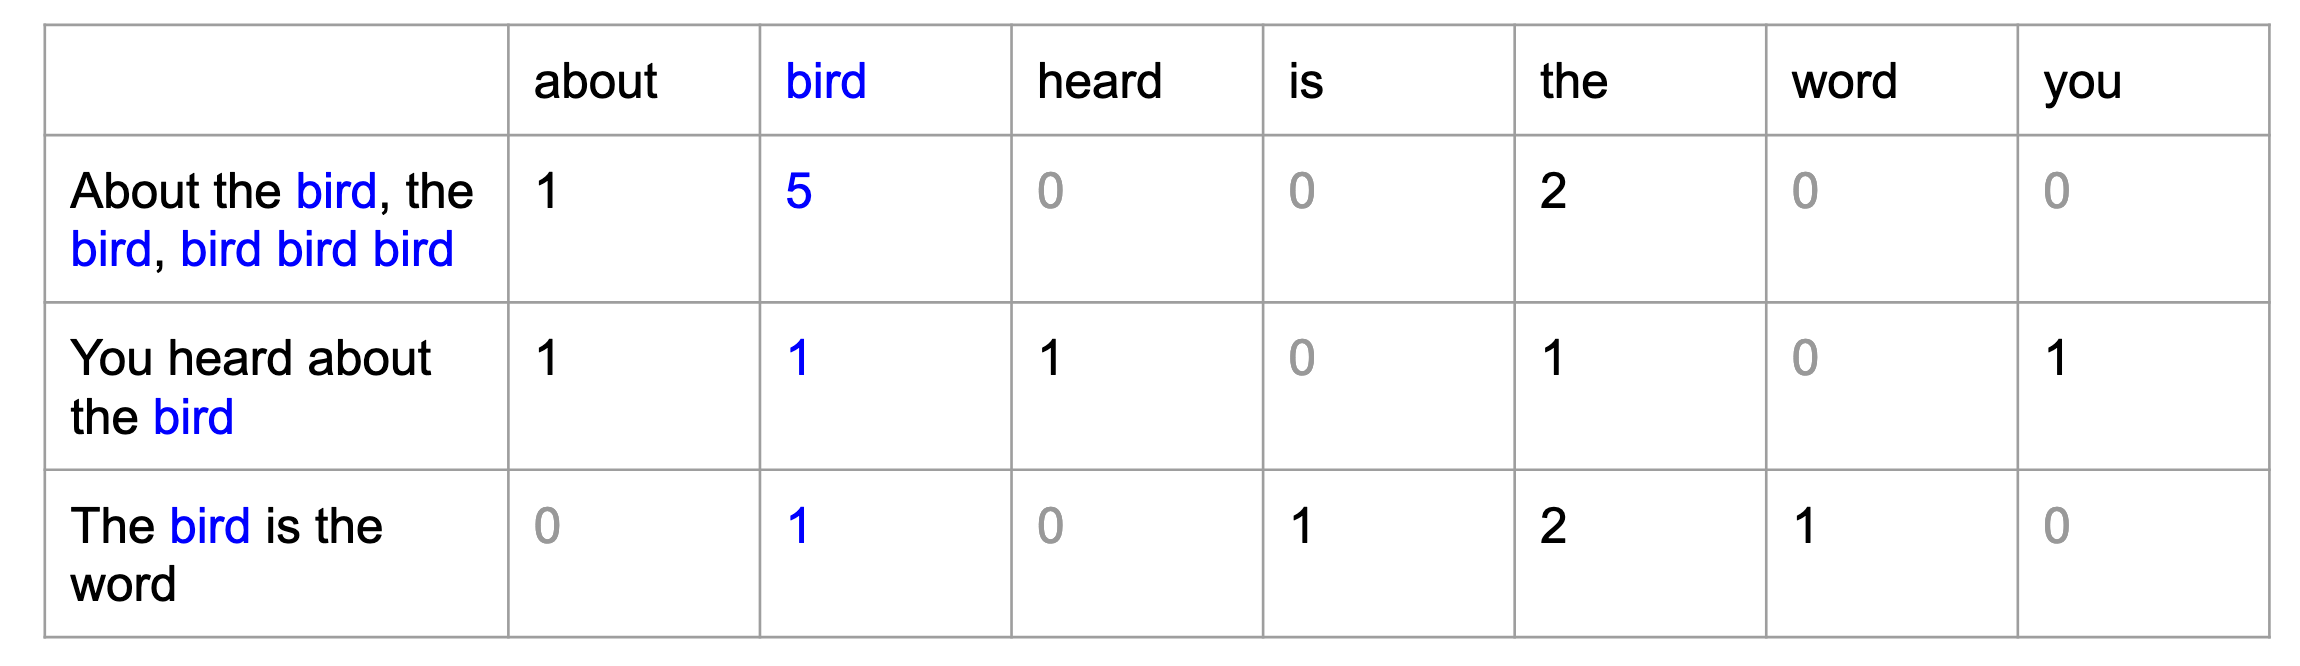



Donne le nombre d'occurences d'une liste de mots : à chaque fois que l'on croise ce mot, on le met dans le sac correspondant et on fait la somme du nombre de mots. la représentation est un vecteur de fréquence d'apparition des différents mots utilisés.

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

- max_df : fréquence maximale que doit avoir un mot, sinon si sa fréquence est supérieure, le mot n'est pas pris en compte.

- min_df : fréquence minimale que doit avoir un mot, sinon si sa fréquence est inférieure, le mot n'est pas pris en compte.

- max_features : nombre max de mots par sac de mots


Les paramètres principaux à spécifier sont max_df et min_df qui correspondent respectivement à la fréquence maximale et minimale d'apparition du feature dans la totalité du texte. La fréquence maximale d'apparition est de 95% et la fréquence minimale d'apparition d'un mot dans le texte est de 1%.
Max_features qui correspond au nombre de mots par sac n'est pas nécessaire ici car le nombre de données étant grand, il n'y a pas de contraintes physiques.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(encoding='utf-8',
                                  strip_accents=None,
                                  lowercase=None,
                                  preprocessor=None,
                                  tokenizer=None,
                                  stop_words=all_stopwords,
                                  analyzer='word',
                                  max_df=0.95,
                                  min_df=0.01)

In [ ]:
# convert the dataframe's column into a matrix

corpus = df_final_text['description_untokenize_clean']

count_wm_untoken = countvectorizer.fit_transform(corpus)


#Let's now obtain the document-term matrix with the .todense() methode
  ## Each row corresponds to one of the sentences, and each column to a word in the corpus.
count_wm_untoken.todense()

In [ ]:
"""
# convert the dataframe's column into a matrix
count_wm_bow_lem = countvectorizer.fit_transform(df_final['description_bow_lem'])

# convert the dataframe's column into a matrix
count_vm_dl = countvectorizer.fit_transform(df_final['description_dl'])

"""

In [ ]:
count_wm_untoken

The bag-of-words approach results in a document-term matrix that is, for the most part, filled with zeros. Such a matrix is called a **sparse matrix**. 

A sparse matrix of `1050 rows by 4749 columns`. The number of columns corresponds to the size of the vocabulary. We could use the vectorizer parameters:  max_df  and  min_df  to filter words that are too frequent or too rare.

In [ ]:
# retrieve the terms found in the corpora 

count_tokens = countvectorizer.get_feature_names()
len(count_tokens)

In [ ]:
df_countvect = pd.DataFrame(data=count_wm_untoken.toarray(),
                            index=df_final_text.index,
                            columns=count_tokens)

In [ ]:
df_countvect.head()

## <font color='blue'>TF-IDF / Term Frequency - Inverse Document Frequency</font>

The `problem with counting word occurrences` is that some words appear only in a limited number of documents. The model will learn that pattern, overfit the training data, and fail to generalize to new texts properly. Similarly, words that are present in all the documents will not bring any information to the classification model. For this reason, it is sometimes better to `normalize the word counts by the number of times they appear in the documents`. This is the general idea behind the **tf-idf vectorization**.

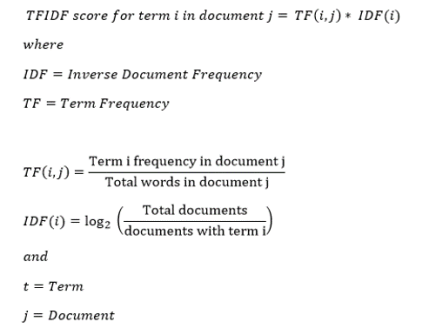


A **tf-idf score** is a decimal number that measures the importance of a word in any document. It gives small values to frequent words in all the documents and more weight to those more scarce across the corpus. 

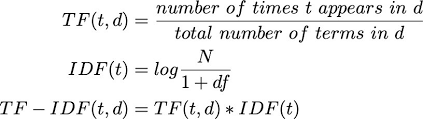

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate the vectorizer object
tfidfvectorizer = TfidfVectorizer(encoding='utf-8',
                                  strip_accents=None,
                                  lowercase=True,
                                  preprocessor=None,
                                  tokenizer=None,
                                  analyzer='word',
                                  stop_words=all_stopwords,
                                  max_df=0.95,
                                  min_df=0.01)

Le calcul `tf-idf` (term frequency–inverse document frequency) permet de calculer un score de proximité entre un terme de recherche et un document.

La partie tf calcule une fonction croissante de la fréquence du terme de recherche dans le document étudié, la partie idf calcule une fonction inversement proportionnelle à la fréquence du terme dans l’ensemble des documents (ou corpus). Le score total, obtenu en multipliant les deux composantes, permet ainsi de donner un score d’autant plus élevé que le terme est surréprésenté.


Nettoyage déjà fait donc la plupart des paramètres sont None.

- max_df : fréquence maximale que doit avoir un mot, sinon si sa fréquence est supérieure, le mot n'est pas pris en compte.

- min_df : fréquence minimale que doit avoir un mot, sinon si sa fréquence est inférieure, le mot n'est pas pris en compte.

Les paramètres principaux à spécifier sont max_df et min_df qui correspondent respectivement à la fréquence maximale et minimale d'apparition du feature dans la totalité du texte. La fréquence maximale d'apparition est de 95% et la fréquence minimale d'apparition d'un mot dans le texte est de 1%.

In [ ]:
#In Scikit-Learn, the resulting TF-IDF vectors are then normalized by the Euclidean norm.

# convert the dataframe's column into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(df_final_text['description_untokenize_clean'])

In [ ]:
# retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer),
# it will give same output of get_feature_names() methods)
tfidf_tokens = tfidfvectorizer.get_feature_names()
len(tfidf_tokens)

In [ ]:
df_tfidf_vect = pd.DataFrame(data=tfidf_wm.toarray(),
                            index=df_final_text.index,
                            columns=tfidf_tokens)

In [ ]:
df_tfidf_vect

In [ ]:
print("\nTD-IDF Vectorizer\n")
df_tfidfvect_total = pd.concat([df_final_text['image'], df_final_text['category'], df_tfidf_vect], axis=1)
df_tfidfvect_total

Pour la suite de nos analyses, nous allons nous baser sur la méthode tf-idf qui est la plus utilisée.

# <font color='green'>Perfoming Clustering </font>

On réalise dans cette partie un clusterig via 3 algorithmes:

- Kmeans
- Clustering hiérarchique
- DBSCAN

Nous allons comparer les clusters obtenus et surtout le clustering sur sa qualité (coefficent de silhouette), mais aussi comparer les clusters obtenus par rapport aux classes réelles des objets grâce à l'indice de Rand ajusté (ARI). On produira des visualisations dans les plans factoriels et via T-SNE.

## <font color='blue'>Reduction de dimension</font>

**Handle a Large Matrix**  : The vocabulary is the set of all unique tokens in a corpus. It's size directly impacts the dimension of the document-term matrix. Reducing the size of the vocabulary is important to avoid performing calculations over gigantic matrices

Using such a **large matrix** to train a classification model will lead to long training times and memory consumption.
Therefore, reducing the size of the vocabulary is crucial. The idea is to remove as many tokens as possible without throwing away relevant information. It's a delicate balance that is entirely dependent on the context. 
- One strategy can be to filter out words that are either too frequent or too rare. 
- Another strategy involves applying dimension reduction techniques (PCA) to the document-term matrix. 


La **réduction PCA** permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (95%.  L'impact est :
- une meilleure séparation des données via le T-SNE et
- une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels = len(l_cat)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [ ]:
l_cat = list(set(df_final_text['category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_final_text.iloc[i]['category'])) for i in range(len(df_final_text))]

## Execution du modèle TF-IDF

In [ ]:
df_tfidf_vect.shape

In [ ]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(df_tfidf_vect)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
df_final_text.head()

In [ ]:
labels.shape

In [ ]:
df_final_text.insert(2, "tfidf_clusters", labels)

In [ ]:
#df_final_text.drop(columns="tfidf_clusters", inplace=True)

In [ ]:
df_final_text.head()

In [ ]:
list_clusters = df_final_text["tfidf_clusters"].unique().tolist()

In [ ]:
for i in list_clusters:
    print(f"Cluster {i} :")
    df_cls_i = df_final_text[df_final_text["tfidf_clusters"] == i]
    cat = df_cls_i['category'].unique()
    print(df_cls_i["category"].value_counts())
    print('Dans le Cluster {} on retrouve les images réparties dans les catégories {} \n'.format(i, len(cat))) 
    print("\n")

In [ ]:
table_tfidf = pd.pivot_table(df_final_text, values='label_category', index=['category'],  # , 'category'
                       columns=['tfidf_clusters'], aggfunc=lambda x: len(x), fill_value=0)
table_tfidf

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Répartition des clusters - Model TF_IDF\n', size=20, weight='bold')
sns.set(font_scale=1.4)  # for label size
sns.heatmap(table_tfidf, annot=True,
            cmap='coolwarm',
            annot_kws={"size": 15, 'weight': 'bold'},
            fmt='g')

plt.ylabel("catégorie\n", weight='bold', size=20)
plt.xlabel('\ncluster', weight='bold', size=17)
plt.show()

In [ ]:
from matplotlib.image import imread

path = "Flipkart/Images/"
list_clusters = df_final_text["tfidf_clusters"].unique().tolist()

for cluster in list_clusters:
    print('Sample Cluster - {} :'.format(cluster))
    image_sample = df_final_text[df_final_text["tfidf_clusters"] == cluster]["image"].sample(9)
    
    plt.figure(figsize=(12,4))
    for i in range(9):
        plt.subplot(190 + 1 + i)
        filename = path + image_sample.iloc[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

### <font color='blue'>Exécution des modèles CountVect et TF-IDF</font>


In [ ]:
l_cat = list(set(df_final_text['category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_final_text.iloc[i]['category'])) for i in range(len(df_final_text))]

# Bag of word - Tf-idf  vs Création des Features

## Préparation sentences

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.8, min_df=5)
ctf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5)


#feat = "description_bow_lem"
feat = "description_untokenize_clean"

cv_fit = cvect.fit(df_final_text[feat])
ctf_fit = ctf.fit(df_final_text[feat])

cv_transform = cvect.transform(df_final_text[feat])  
ctf_transform = ctf.transform(df_final_text[feat])  

#cvect_features_names = cvect.get_feature_names()
#ctf_features_names = ctf.get_feature_names()
#cv_transform

## Exécution des modèles

In [ ]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(df_countvect)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(df_tfidf_vect)

## Graphiques

In [ ]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

La valeur de la silhouette mesure la similitude d'un objet avec son propre cluster (cohésion) par rapport à d'autres clusters (séparation). La valeur de la silhouette est comprise entre [1, -1], où une valeur élevée indique que l'objet est bien adapté à son propre cluster et mal adapté aux clusters voisins.

Ici le coefficient de silhouette est positif mais assez proche de 0, ce qui permet de dire que les points sont globalement bien répartis entre les clusters et que les clusters sont proches les uns des autres (valeur proche de 0).

In [ ]:
df_final_text

# LDA  - LatentDirichletAllocation

In [ ]:
#!pip install gensim

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import word2vec

In [ ]:

n_topics = 7 

lda = LatentDirichletAllocation(n_components=n_topics,
                          max_iter=5, 
                          learning_method='online', 
                          learning_offset=50., 
                          random_state= 0).fit(ctf_transform)

In [ ]:
def display_topics(model, features_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d :" % (topic_idx))
        print ( " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
#display_topics(lda, features_names, 10)

In [ ]:
def gen_words(texts):
    final = [] 
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [ ]:
cleaned_docs = df_final_text['description_untokenize_clean']


data_words = gen_words(cleaned_docs)
print(data_words[0][0:10])

In [ ]:
# BIGRAMS AND TRIGRAMS 

# Build the bigram and trigram models
bigrams_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigrams_phrases)
trigram_mod = gensim.models.phrases.Phraser(trigrams_phrases)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[1]]])


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


data_bigrams = make_bigrams(data_words)
print(data_bigrams[0], "\n")

data_bigrams_trigrams = make_trigrams(data_bigrams)
print(data_bigrams_trigrams[0])

In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print(corpus[0][0:15])

In [ ]:
word = id2word[[0][:1][0]]
print(word)

In [ ]:
#cleaned_docs = data_T['description_bow_lem']

lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                     id2word=id2word,
                                     num_topics=7, 
                                     random_state=100,
                                     update_every=1,
                                     chunksize=100,
                                     passes=1,
                                     alpha="auto")

In [ ]:
#!pip install pyLDAvis

In [ ]:
## Visualisation of data

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

In [ ]:
vis

In [ ]:
# TF_IDF REMOVAL

from gensim.models import TfidfModel


id2Word_2 = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus_2 = [id2Word_2.doc2bow(text) for text in texts]
print(corpus_2[0][0:20])


In [ ]:
# Build LDA model
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus_2,
                                           id2word=id2Word_2,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pyLDAvis.enable_notebook()
vis_2 = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_2, id2Word_2, mds="mmds", R=30)

In [ ]:
vis_2

# Word2Vec

In [ ]:
#!pip install gensim

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [ ]:
data_T = df_final_text.copy()

In [ ]:
data_T.head()

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_T['description_bow_lem'].to_list()
#sentences = data_T['description_untokenize_clean'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

## Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
embedding_matrix

## Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

## Exécution du modèle Word2Vec

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = data_T['description_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

## Fonctions Communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [ ]:
data_T.head()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data_T['description_dl'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)